### Imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import platform
from pathlib import Path
if platform.system() == "Darwin":
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/sleep_deprivation/DataPaths/'])
    plot_dir = Path("/Users/nkinsky/Documents/UM/Working/Bapun_Data/plots")
else:
    sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
    sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])
    
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
from neuropy.utils.mathutil import min_max_scaler
from scipy.ndimage import gaussian_filter1d, gaussian_filter

from neuropy import plotting
from neuropy.analyses.placefields import Pf1D
from neuropy.core.position import Position
from neuropy.plotting import plot_ratemap
from neuropy.plotting.figure import Fig
from neuropy.utils.misc import flatten

import subjects

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

/Users/nkinsky/mambaforge/envs/NeuroPy/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Define useful functions

### Visualize running behavior for all rats and tally lap #s by hand

In [2]:
#1st # = maze trials, 2nd # = remaze trial, 2 trials = 1 lap up/down
ntrials_dict = {"RatUDay2": [25, 17], "RatVDay1": [23, 30], "RatVDay3": [163, 103],
                "RatSDay3": [23, 16], "RatUDay1": [54, 4], "RatUDay4": [32, 4],
                "RatVDay2": [79, 92], "RatRDay2": [41, 10]}
sessions = subjects.remaze_sess()[1:]  # RatSDay2NSD does not have remaze position info

In [ ]:
sess.paradigm["maze"].flatten()

In [18]:
neurons_maze = sess.neurons_stable.get_neuron_type("pyr").time_slice(*sess.paradigm["maze"].flatten())

In [19]:
neurons_maze.save(sess.filePrefix.with_suffix(".neurons_stable_maze.npy"))

/data/Clustering/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38.neurons_stable_maze.npy saved


In [ ]:
%matplotlib widget
for sess in subjects.remaze_sess()[1:]:
    fig, ax = plt.subplots(2, 1, figsize=(10, 4))
    fig.suptitle(f"{sess.tag}: {sess.name}")
    ax[0].plot(sess.maze.time, sess.maze.x)
    ax[0].set_title("MAZE")
    ax[1].plot(sess.remaze.time, sess.remaze.x)
    ax[1].set_title("REMAZE")
    for col, dir in zip([[0, 1, 0, 0.3], [1, 0, 0, 0.3]], ["up", "down"]):
        for start, stop in zip(sess.remaze_run[dir].starts, sess.remaze_run[dir].stops):
            ax[1].axvspan(start, stop, color=col)

### Construct placefield object

In [20]:
dir_use = Path("/data/Clustering/sessions/RatU/RatUDay2NSD")

In [ ]:
file_use = dir_use / "RatU_Day2NSD_2021-07-24_08-16-38"
neurons = Neurons.from_file(file_use.with_suffix(".neurons_stable_maze.npy"), convert=True)
maze = Position.from_file(file_use.with_suffix(".maze.linear.npy"), convert=True)
kw = dict(frate_thresh=0, grid_bin=5)  # Define placefield parameters

pfmaze = Pf1D(neurons, position=maze, **kw)  # Create placefield object

### Plot all placefields

/Users/nkinsky/Documents/UM/GitHub/NeuroPy/neuropy/utils/mathutil.py:67: RuntimeWarning: invalid value encountered in divide
  return (x - np.min(x, axis=axis, keepdims=True)) / np.ptp(


<Axes: xlabel='Position'>

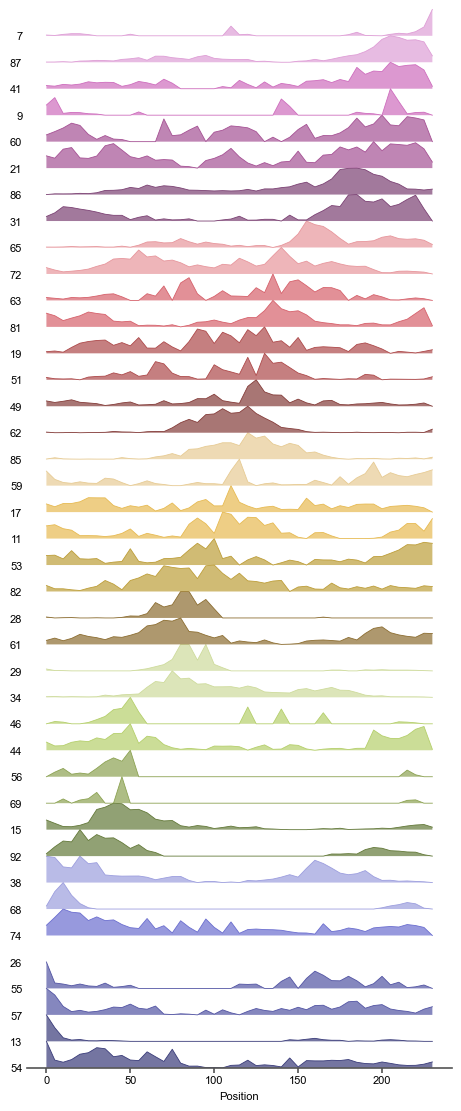

In [21]:
pfmaze_ds = pfmaze.neuron_slice(list(np.arange(40, dtype=int)))  # Keep only 40 neurons to make visualization more manageable
pfmaze_ds.plot_ratemaps(normalize_tuning_curve=True)

### Now plot placefields with rasters

In [22]:
# Grab one neuron from the beginning, middle, and end, both by index and by id
ids = [54, 85, 87] 
inds = [20, 36, 38] # or [np.where(id == pfmaze_ds.neuron_ids)[0][0] for id in ids]

#### Loop through by id and plot raster for each neuron

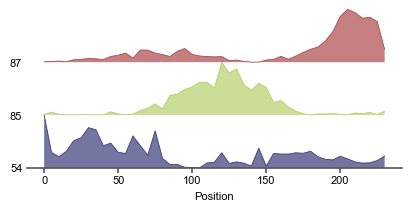

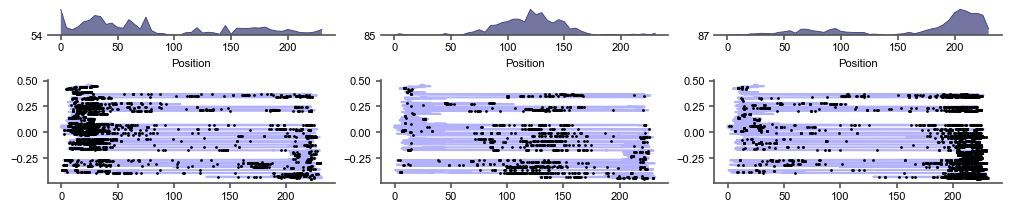

In [23]:
_, ax = plt.subplots(1, 1, figsize=(4, 2))
pfmaze_ds.neuron_slice(ids=ids).plot_ratemaps(normalize_tuning_curve=True, ax=ax)
_, ax2 = plt.subplots(2, 3, figsize=(10, 2), height_ratios=[1, 4])
for id, a in zip(ids, ax2.T):
    pfmaze_ds.plot_ratemap_w_raster(id=id, ax=a)

#### Same but plot by index this time

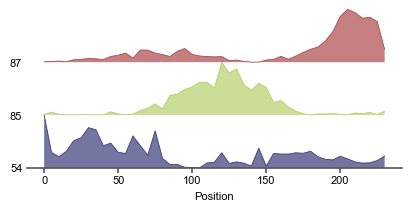

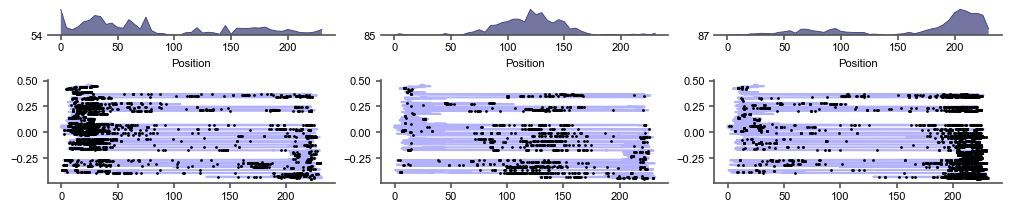

In [24]:
_, ax = plt.subplots(1, 1, figsize=(4, 2))
pfmaze_ds.neuron_slice(ids=ids).plot_ratemaps(normalize_tuning_curve=True, ax=ax)
_, ax2 = plt.subplots(2, 3, figsize=(10, 2), height_ratios=[1, 4])
for ind, a in zip(inds, ax2.T):
    pfmaze_ds.plot_ratemap_w_raster(ind=ind, ax=a)